In [13]:
import sys
sys.path.insert(0,'/home/emmanuel/Drives/erc/code/gp_autograd')

from gp_autograd.gaussianprocess import GaussianProcess, sample_data

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Sample Data

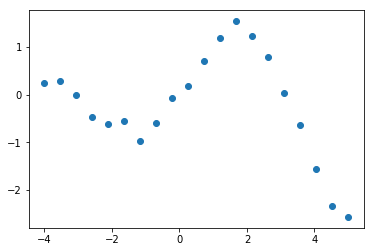

In [14]:
xtrain, xtest, ytrain, ytest = sample_data()

# Plot
fig, ax = plt.subplots()

ax.scatter(xtrain, ytrain)

plt.show()


## Fit GP Model

In [15]:
# Initialize GP Model
gp_model = GaussianProcess()

gp_model.fit(xtrain, ytrain);

### Predictions and Variance

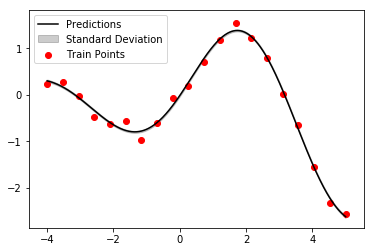

In [16]:
# Get predictions
y_pred, y_std = gp_model.predict(xtest, return_std=True)

# Plot results
fig, ax = plt.subplots()

upper_limit = y_pred.squeeze() + y_std.squeeze()
lower_limit = y_pred.squeeze() - y_std.squeeze()



ax.fill_between(xtest.squeeze(), upper_limit, lower_limit,
                color='k', alpha=0.2, label='Standard Deviation')
ax.plot(xtest, y_pred, color='black', label='Predictions')
ax.scatter(xtrain, ytrain, color='red', label='Train Points')

ax.legend()
plt.show()


## 1st and 2nd Derivatives

In [17]:
mean_1der = gp_model.mu_grad(xtest)          # 1st Derivative
mean_2der = gp_model.mu_grad(xtest, nder=2)  # 2nd Derivative

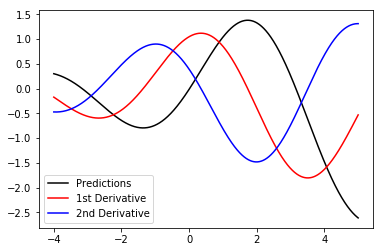

In [18]:
# Plot results
fig, ax = plt.subplots()

ax.plot(xtest, y_pred, color='black', label='Predictions')
ax.plot(xtest, mean_1der, color='red', label='1st Derivative')
ax.plot(xtest, mean_2der, color='blue', label='2nd Derivative')

ax.legend()
plt.show()